In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
%matplotlib inline
import seaborn as sns

In [2]:
#reading data as excel as csv file is too big
dating = pd.read_excel('/home/amybirdee/hobby_projects/dating_site/profiles.xlsx')

In [3]:
dating.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,removed_for_privacy,removed_for_privacy,removed_for_privacy,removed_for_privacy,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,removed_for_privacy,removed_for_privacy,removed_for_privacy,removed_for_privacy,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,removed_for_privacy,removed_for_privacy,removed_for_privacy,removed_for_privacy,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [4]:
#checking number of rows and columns
dating.shape

(59946, 31)

In [5]:
#checking datatypes
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       59946 non-null  object 
 7   essay1       59946 non-null  object 
 8   essay2       59946 non-null  object 
 9   essay3       59946 non-null  object 
 10  essay4       59946 non-null  object 
 11  essay5       59946 non-null  object 
 12  essay6       59946 non-null  object 
 13  essay7       59946 non-null  object 
 14  essay8       59946 non-null  object 
 15  essay9       59946 non-null  object 
 16  ethnicity    54263 non-null  object 
 17  height       59940 non-null  float64
 18  income       59943 non-null  float64
 19  job 

In [6]:
#descibing the data
dating.describe(include = 'all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,59946,59946,59946,59946,...,59943,24383,59943,40023,39717,59943,48887,54431,59893,59943
unique,NaN,12,18,6,3,32,1,1,1,1,...,199,15,3,15,45,2,48,5,7646,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,removed_for_privacy,removed_for_privacy,removed_for_privacy,removed_for_privacy,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,59946,59946,59946,59946,...,31064,7559,51603,14813,2723,35826,1782,43893,21828,55695
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#checking column names
dating.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [8]:
#dropping the essay columns and last_online as not needed for analysis
dating = dating.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', \
                     'last_online'], axis = 1)

In [9]:
dating.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [10]:
#filling in nan values - using median for age since dataset is right skewed and averages for rest of numeric values. 
#Using most common values for some non-numeric variables where there are only a few missing values. 
#Otherwise filling with 'no response given' 
dating['age'] = dating.age.fillna(dating['age'].median())
dating['body_type'] = dating.body_type.fillna('average')
dating['diet'] = dating.diet.fillna('no response given')
dating['drinks'] = dating.drinks.fillna('no response given')
dating['drugs'] = dating.drugs.fillna('no response given')
dating['education'] = dating.education.fillna('no response given')
dating['ethnicity'] = dating.ethnicity.fillna('no response given')
dating['height'] = dating.height.fillna(dating['height'].mean())
dating['income'] = dating.income.fillna(dating['income'].mean())
dating['job'] = dating.job.fillna('no response given')
dating['location'] = dating.location.fillna('no response given')
dating['offspring'] = dating.offspring.fillna('no response given')
dating['orientation'] = dating.orientation.fillna('no response given')
dating['pets'] = dating.pets.fillna('no response given')
dating['religion'] = dating.religion.fillna('no response given')
dating['sex'] = dating.sex.fillna('no response given')
dating['sign'] = dating.sign.fillna('no response given')
dating['smokes'] = dating.smokes.fillna('no response given')
dating['speaks'] = dating.speaks.fillna('no response given')
dating['status'] = dating.status.fillna('no response given')

In [11]:
#apostrophes are being replaces with '&rsquo;' - fixing this
dating['offspring'] = dating['offspring'].str.replace('doesn&rsquo;t', "doesn't")
dating['sign'] = dating['sign'].str.replace('doesn&rsquo;t', "doesn't")

In [12]:
#converting numeric fields to integers rather than floats
dating['age'] = dating.age.astype(int)
dating['height'] = dating.height.astype(int)
dating['income'] = dating.income.astype(int)

In [13]:
#all records now filled in
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          59946 non-null  int64 
 1   body_type    59946 non-null  object
 2   diet         59946 non-null  object
 3   drinks       59946 non-null  object
 4   drugs        59946 non-null  object
 5   education    59946 non-null  object
 6   ethnicity    59946 non-null  object
 7   height       59946 non-null  int64 
 8   income       59946 non-null  int64 
 9   job          59946 non-null  object
 10  location     59946 non-null  object
 11  offspring    59946 non-null  object
 12  orientation  59946 non-null  object
 13  pets         59946 non-null  object
 14  religion     59946 non-null  object
 15  sex          59946 non-null  object
 16  sign         59946 non-null  object
 17  smokes       59946 non-null  object
 18  speaks       59946 non-null  object
 19  status       59946 non-nu

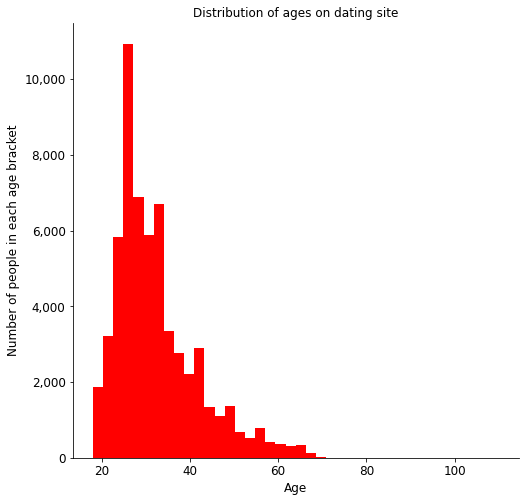

In [14]:
#checking age distribution - shows a right skew
plt.figure(figsize = (8,8))
ax = plt.subplot()

dating['age'].hist(bins = 40, color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#function to add comma separator to labels. Function takes tick label and tick position
def comma(x, pos): 
    return format(x, ",.0f")
    
#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xlabel('Age', fontsize = 12)
plt.ylabel('Number of people in each age bracket', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

plt.title('Distribution of ages on dating site', fontsize = 12)
plt.grid(None)
plt.savefig('Age - histogram', bbox_inches = 'tight')

In [15]:
#grouping by age to see the data - a couple of ages over 100 - anomalies or might be false data
Age = dating.groupby('age').size().reset_index().rename(columns = {0: 'count_of_age'})
Age.head()

,age,count_of_age
0,18,309
1,19,611
2,20,953
3,21,1282
4,22,1934


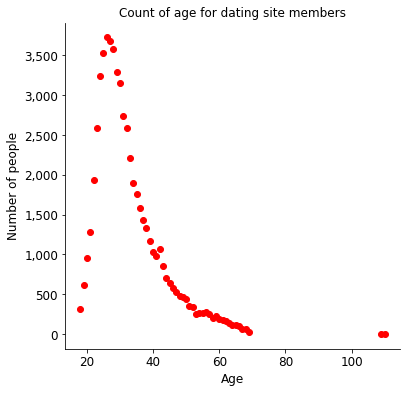

In [16]:
#plotting a scatter plot of ages - most people are mid 20s-30
plt.figure(figsize = (6,6))
ax = plt.subplot()

plt.scatter(Age['age'], Age['count_of_age'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xlabel('Age', fontsize = 12)
plt.ylabel('Number of people', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

plt.title('Count of age for dating site members', fontsize = 12)
plt.savefig('Age - scatter plot')

In [17]:
#grouping ages into 7 groups for barplot using pd.cut to cut the age column
bins = [17, 19, 29, 39, 49, 59, 69, np.inf]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
Age['age_range'] = pd.cut(Age['age'], bins = bins, labels = labels)
Age.head()

,age,count_of_age,age_range
0,18,309,<20
1,19,611,<20
2,20,953,20-29
3,21,1282,20-29
4,22,1934,20-29


In [18]:
#grouping age ranges
age_range = Age.groupby('age_range').count_of_age.sum().to_frame().reset_index()
age_range

,age_range,count_of_age
0,<20,920
1,20-29,27821
2,30-39,19846
3,40-49,7338
4,50-59,2860
5,60-69,1159
6,70+,2


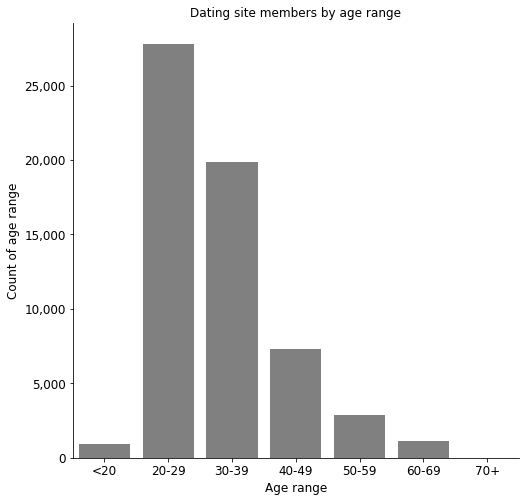

In [19]:
#barplot of ages - ci = None removes the confidence intervals
plt.figure(figsize = (8,8))
ax = sns.barplot(x = age_range['age_range'], y = age_range['count_of_age'], color = 'grey', ci = None)

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xlabel('Age range', fontsize = 12)
plt.ylabel('Count of age range', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

plt.title('Dating site members by age range', fontsize = 12)
plt.savefig('Age - barplot', bbox_inches = 'tight')

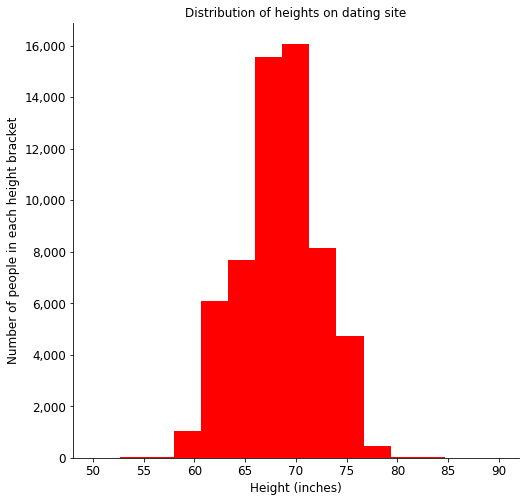

In [20]:
#checking height distribution - shows a relatively normal distribution
plt.figure(figsize = (8,8))
ax = plt.subplot()
dating['height'].hist(bins = 15, range = [50, 90], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xlabel('Height (inches)', fontsize = 12)
plt.ylabel('Number of people in each height bracket', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

plt.title('Distribution of heights on dating site', fontsize = 12)
plt.grid(None)
plt.savefig('Height - histogram', bbox_inches = 'tight')

In [21]:
#grouping by height to see the data - most people are 60-70 inches but 20 are 95 inches. A few people in the 1-9 inch
#category - these are likely incorrect datapoints which haven't been filled in properly 
height = dating.groupby('height').size().reset_index().rename(columns = {0: 'count_of_height'})
height.head()

,height,count_of_height
0,1,1
1,3,1
2,4,1
3,6,1
4,8,1


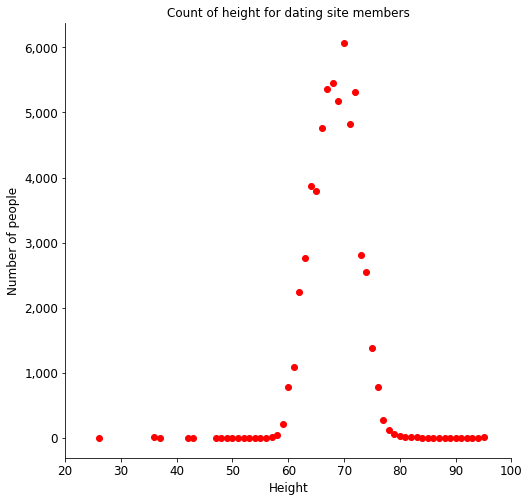

In [22]:
#plotting a scatter plot of heights - have excluded the very low heights that were clearly wrong
plt.figure(figsize = (8,8))
ax = plt.subplot()
plt.scatter(height['height'], height['count_of_height'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

ax.set_xlim(20, 100)
plt.xlabel('Height', fontsize = 12)
plt.ylabel('Number of people', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

plt.title('Count of height for dating site members', fontsize = 12)
plt.savefig('Height - scatter plot')

In [23]:
#grouping heights into groups for barplot using pd.cut to cut the height column
bins = [0, 40, 50, 60, 70, 80, 90, np.inf]
labels = ['<40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']
height['height_range'] = pd.cut(height['height'], bins = bins, labels = labels)
height.head()

,height,count_of_height,height_range
0,1,1,<40
1,3,1,<40
2,4,1,<40
3,6,1,<40
4,8,1,<40


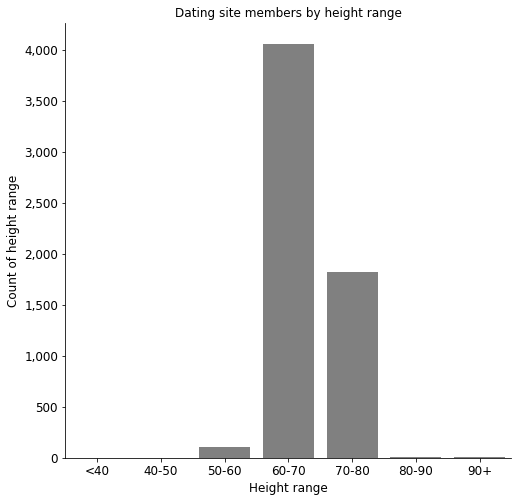

In [24]:
#barplot of heights
plt.figure(figsize = (8,8))
ax = sns.barplot(x = height['height_range'], y = height['count_of_height'], color = 'grey', ci = None)

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xlabel('Height range', fontsize = 12)
plt.ylabel('Count of height range', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Dating site members by height range', fontsize = 12)
plt.savefig('Height - barplot')

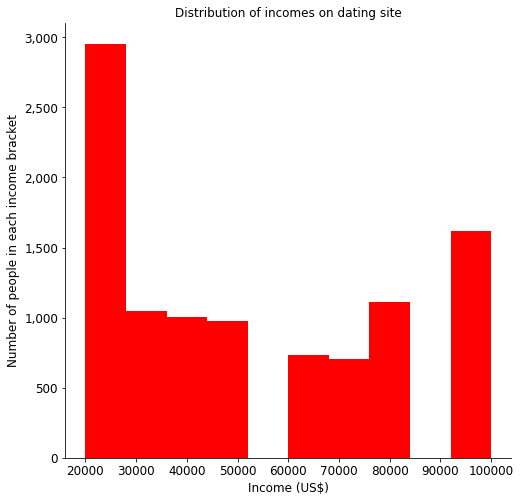

In [25]:
#checking income distribution - most people are on lower incomes but many did not fill this fields in. A few people also
#said their income was $1,000,000 which propbably isn't true - have excluded from chart
plt.figure(figsize = (8,8))
ax = plt.subplot()
dating['income'].hist(bins = 10, range = [20000, 100000], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xlabel('Income (US$)', fontsize = 12)
plt.ylabel('Number of people in each income bracket', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

plt.title('Distribution of incomes on dating site', fontsize = 12)
plt.grid(None)
plt.savefig('Income - histogram')

In [26]:
#grouping by income to see the data - 81% of people put -1 for this which likely means they didn't answer the question
income = dating.groupby('income').size().reset_index().rename(columns = {0: 'count_of_income'})
income.head()

,income,count_of_income
0,-1,48440
1,20000,2952
2,20033,3
3,30000,1048
4,40000,1004


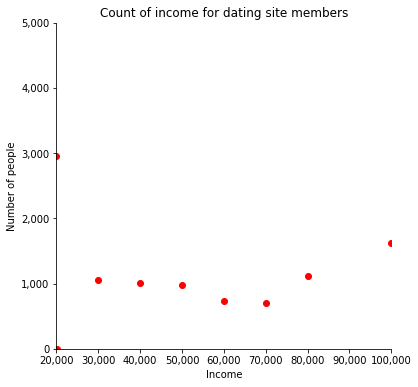

In [27]:
#plotting a scatter plot of income - have excluded the very low and high incomes that were clearly wrong or incomplete
plt.figure(figsize = (6,6))
ax = plt.subplot()
plt.scatter(income['income'], income['count_of_income'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
ax.xaxis.set_major_formatter(tcr.FuncFormatter(comma))

ax.set_xlim(20000, 100000)
ax.set_ylim(0, 5000)
plt.xlabel('Income')
plt.ylabel('Number of people')

plt.title('Count of income for dating site members')
plt.savefig('Income - scatter plot')

In [28]:
#grouping income into groups for barplot using pd.cut to cut the income column
bins = [0, 40000, 60000, 80000, 100000, np.inf]
labels = ['<40', '40-60', '60-80', '80-100', '100+']
income['income_range'] = pd.cut(income['income'], bins = bins, labels = labels)
income

,income,count_of_income,income_range
0,-1,48440,NaN
1,20000,2952,<40
2,20033,3,<40
3,30000,1048,<40
4,40000,1004,<40
5,50000,975,40-60
6,60000,736,40-60
7,70000,707,60-80
8,80000,1111,60-80
9,100000,1621,80-100


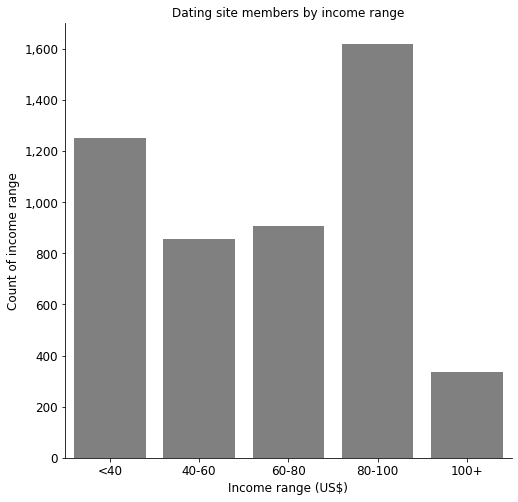

In [29]:
#barplot of income - have excluded those who didn't fill this in
plt.figure(figsize = (8,8))
ax = sns.barplot(x = income['income_range'], y = income['count_of_income'], color = 'grey', ci = None)

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))


plt.xlabel('Income range (US$)', fontsize = 12)
plt.ylabel('Count of income range', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

plt.title('Dating site members by income range', fontsize = 12)
plt.savefig('Income - barplot')

In [30]:
#converting dating dataframe to csv as will continue analysising categorical values in a new notebook
dating = dating.to_csv('/home/amybirdee/hobby_projects/dating_site/dating_clean.csv', index = False)